predicting the temperature

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

## data ingestion

In [46]:
#Read a CSV file
df = pd.read_csv('weatherHistory.csv')

## overview

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [48]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [49]:
print(df.shape)

(96453, 12)


## Exploratory Data analysis(EDA)

## Checking for missing values

In [63]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### visualisation

#### Univariate Analysis

<Axes: xlabel='Temperature (C)', ylabel='Count'>

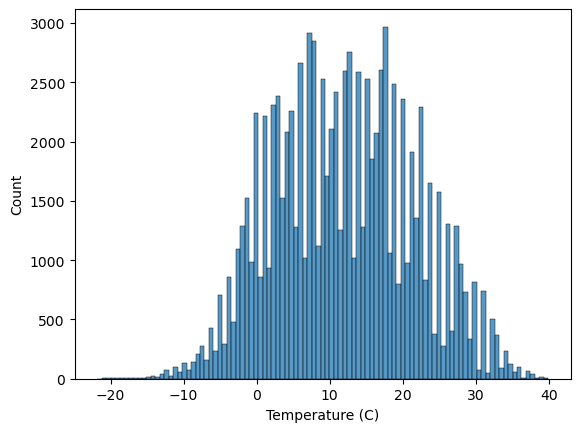

In [64]:
sns.histplot(x='Temperature (C)',data=df)

<Axes: xlabel='Temperature (C)'>

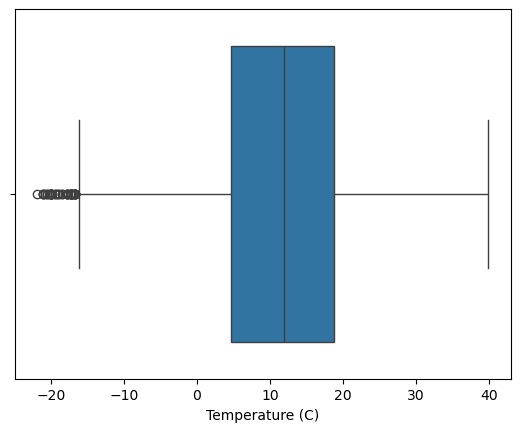

In [65]:
sns.boxplot(x='Temperature (C)',data=df)

<Axes: xlabel='Apparent Temperature (C)'>

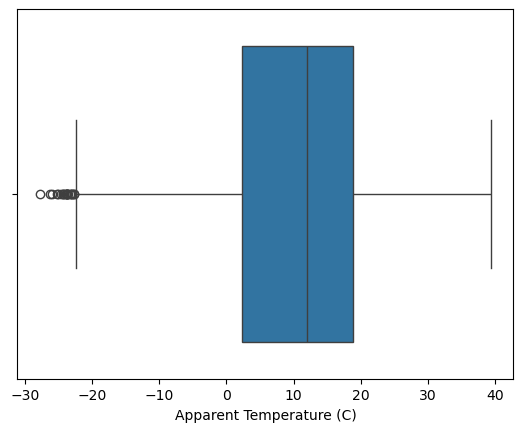

In [66]:
sns.boxplot(x='Apparent Temperature (C)',data=df)
            






<Axes: xlabel='Humidity'>

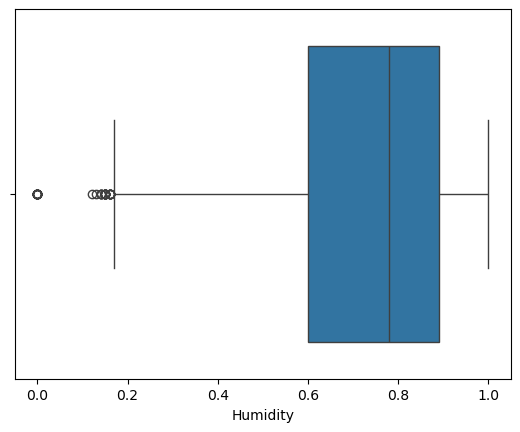

In [67]:
sns.boxplot(x='Humidity',data=df)

* Humidity is mostly distributed in between o.6 and o.9 with the median of 0.8

#### categorical plots 

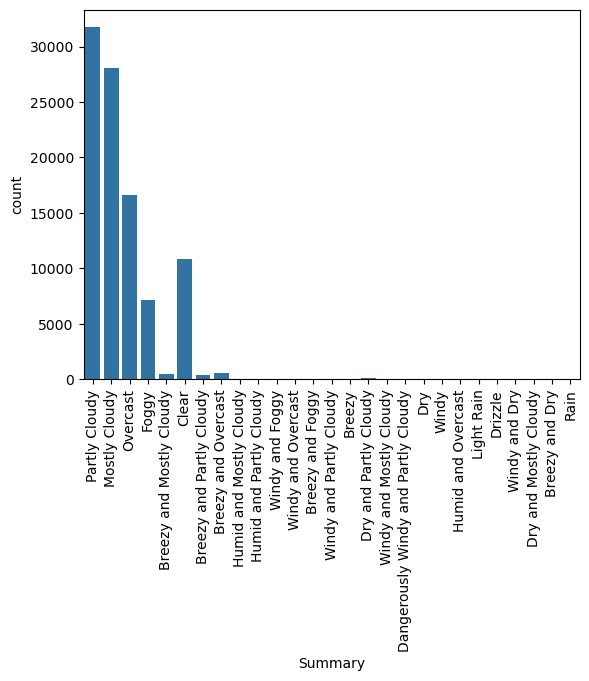

In [68]:
sns.countplot(x='Summary',data=df)
plt.xticks(rotation=90)
plt.show()

The chart shows that “Partly Cloudy,” “Mostly Cloudy,” and “Overcast” are by far the most common weather conditions, while all other categories occur much less frequently. This suggests that the dataset is dominated by cloudy conditions, with rainy, windy, and foggy weather being relatively rare

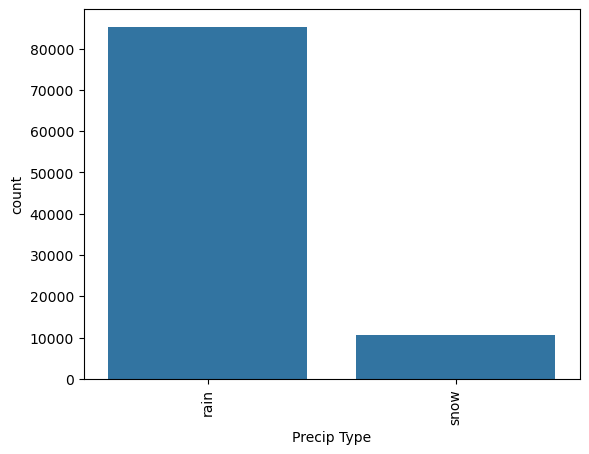

In [69]:
sns.countplot(x='Precip Type',data=df)
plt.xticks(rotation=90)
plt.show()

### Multivariate analysis

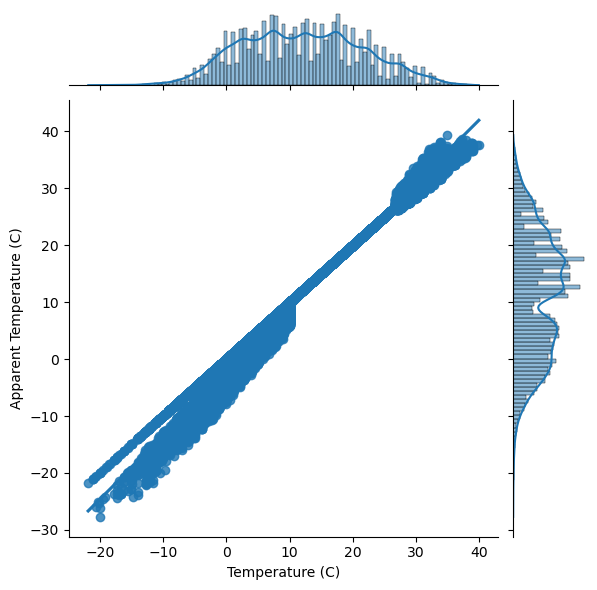

In [70]:
sns.jointplot(x='Temperature (C)',y='Apparent Temperature (C)', data = df,kind='reg')


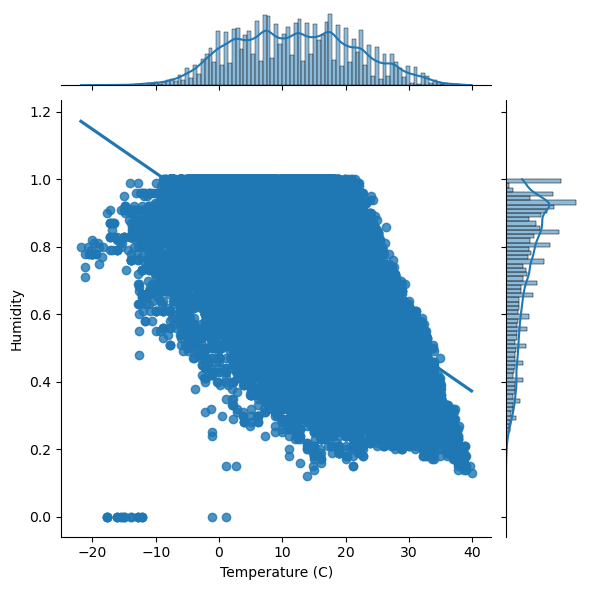

In [71]:
sns.jointplot(x='Temperature (C)',y='Humidity', data = df,kind='reg')

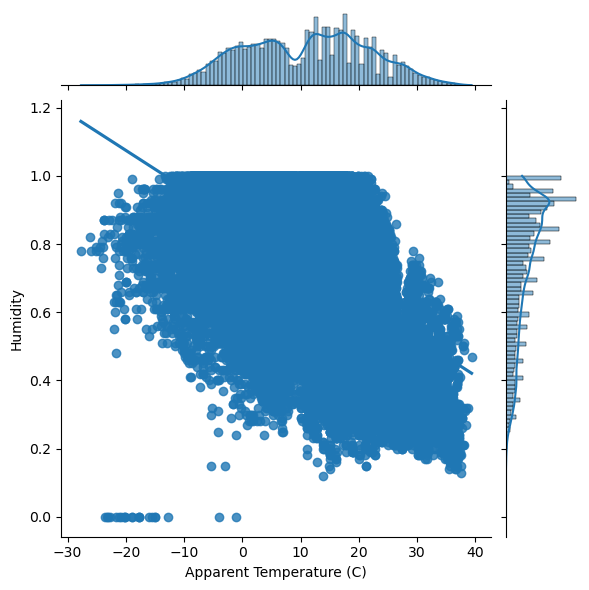

In [72]:
sns.jointplot(x='Apparent Temperature (C)',y='Humidity', data = df,kind='reg')

##### categorical plot

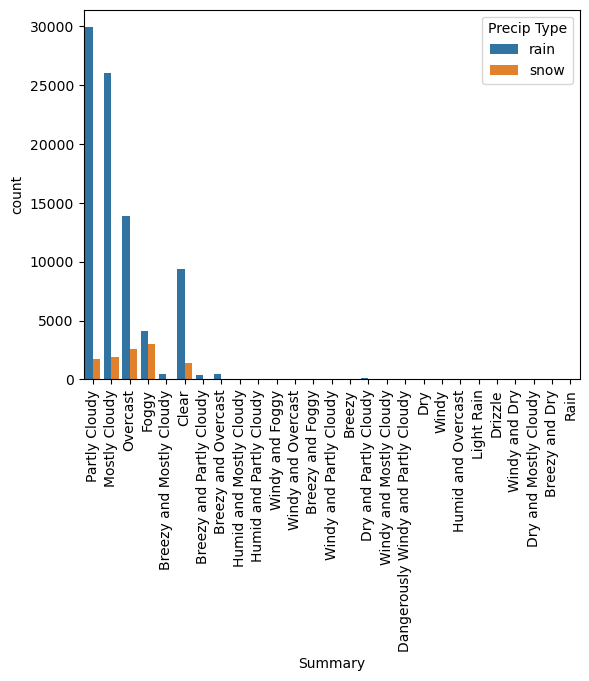

In [73]:
sns.countplot(x='Summary',hue='Precip Type',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

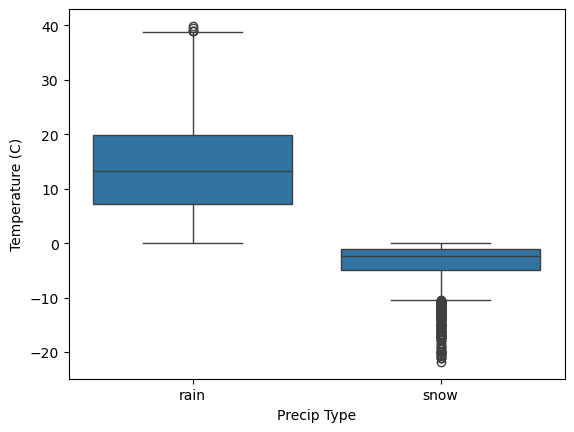

In [74]:
sns.boxplot(x ='Precip Type',y='Temperature (C)', data=df)

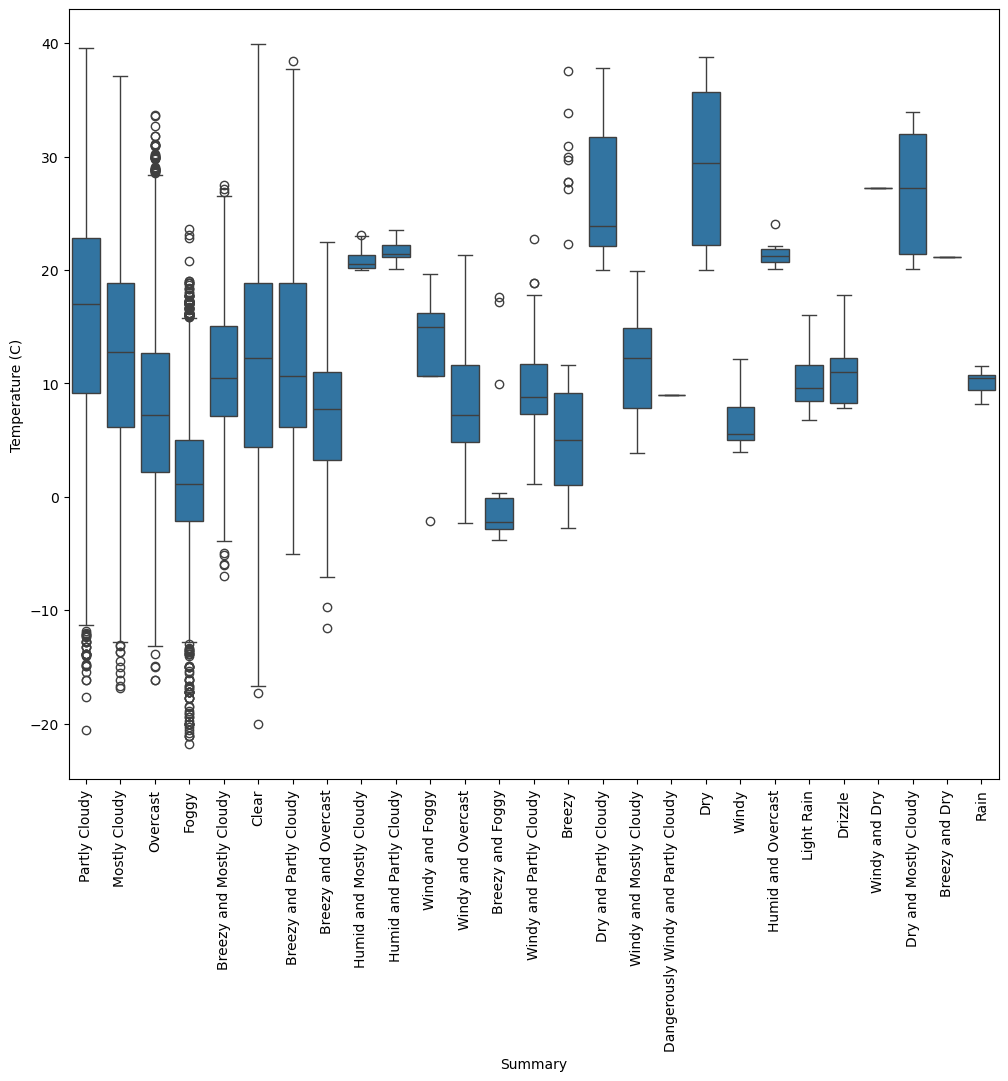

In [75]:
plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Summary',y='Temperature (C)', data=df)
plt.xticks(rotation=90)
plt.show()

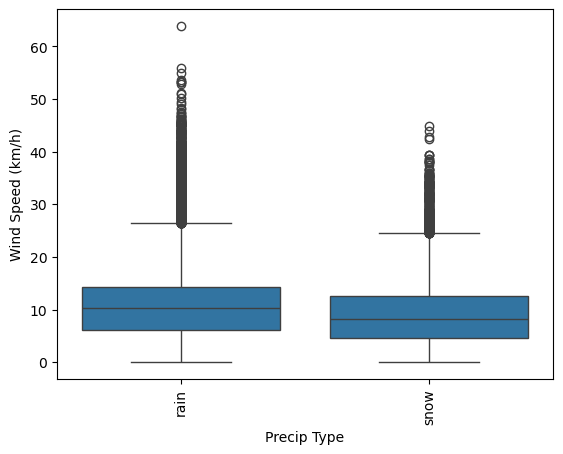

In [78]:
#plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Precip Type',y='Wind Speed (km/h)', data=df)
plt.xticks(rotation=90)
plt.show()

####Average wind speeds are roughly the same for rain and snow.

But rainy conditions occasionally bring stronger winds.

Snow  to occur with slightly calmer wind conditions.

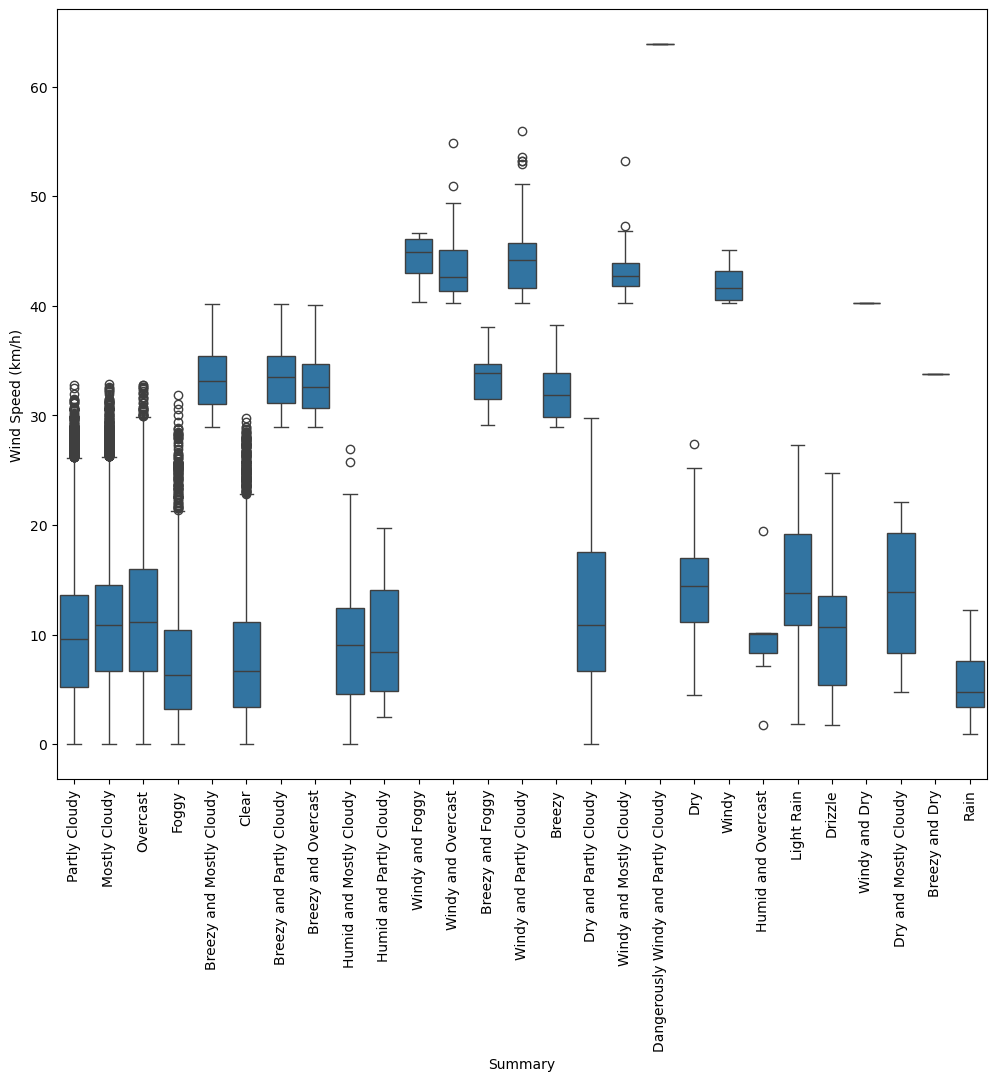

In [80]:
plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Summary',y='Wind Speed (km/h)', data=df)
plt.xticks(rotation=90)
plt.show()

-Windy weather conditions (as named) clearly correlate with higher wind speeds.

-Cloudy or foggy conditions tend to be calmer.

-Rain and humidity produce moderate winds on average.

-The variance in wind speeds is much higher in windy conditions than in calm or cloudy ones